In [51]:
import numpy as np
import pandas as pd
import os

# Loop through the directory and print filenames
for dirname, _, filenames in os.walk(directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))





# Importing Libraries

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading Dataset

In [6]:
df = pd.read_csv('/content/drive/MyDrive/hair fall detection/data1.csv') 

In [ ]:
df.head()

,total_protein,total_keratine,hair_texture,vitamin,manganese,iron,calcium,body_water_content,stress_level,liver_data,hair_fall
0,312,100,14,249,87,55,333,44,41,368,4
1,52,207,3,425,387,1,182,26,65,41,1
2,170,197,11,140,199,91,414,30,54,90,4
3,256,334,19,358,120,3,35,48,45,65,2
4,309,185,58,207,329,301,345,23,90,346,4


# Checking for null values

In [7]:
df.isna().sum()

total_protein         0
total_keratine        0
hair_texture          0
vitamin               0
manganese             0
iron                  0
calcium               0
body_water_content    0
stress_level          0
liver_data            0
hair_fall             0
dtype: int64

In [9]:
df.shape

(100000, 11)

In [10]:
df.describe() 

,total_protein,total_keratine,hair_texture,vitamin,manganese,iron,calcium,body_water_content,stress_level,liver_data,hair_fall
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,249.573960,248.875470,49.558400,249.949730,249.558480,249.099260,250.538160,49.484590,49.366180,249.769930,2.501520
std,144.427199,144.193226,28.913959,144.240639,144.283595,144.341273,144.467648,28.863998,28.928164,144.639119,1.710604
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.000000,124.000000,25.000000,125.000000,125.000000,124.000000,125.000000,24.000000,24.000000,124.000000,1.000000
50%,250.000000,249.000000,50.000000,250.000000,250.000000,249.000000,251.000000,50.000000,49.000000,250.000000,2.000000
75%,375.000000,373.000000,75.000000,375.000000,375.000000,374.000000,376.000000,74.000000,75.000000,376.000000,4.000000
max,499.000000,499.000000,99.000000,499.000000,499.000000,499.000000,499.000000,99.000000,99.000000,499.000000,5.000000


# EDA

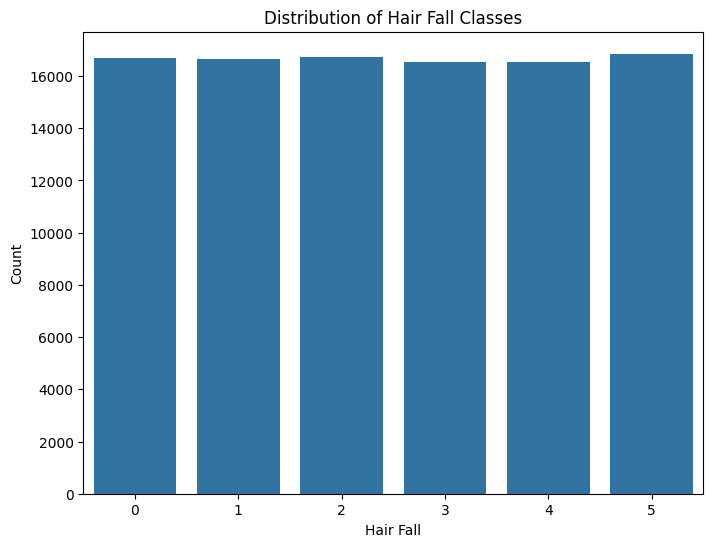

In [11]:
# Plotting the distribution of the 'hair_fall' classes
plt.figure(figsize=(8, 6))
sns.countplot(x='hair_fall', data=df)
plt.title('Distribution of Hair Fall Classes')
plt.xlabel('Hair Fall')
plt.ylabel('Count')
plt.show()

Here we can see dataset is balanced

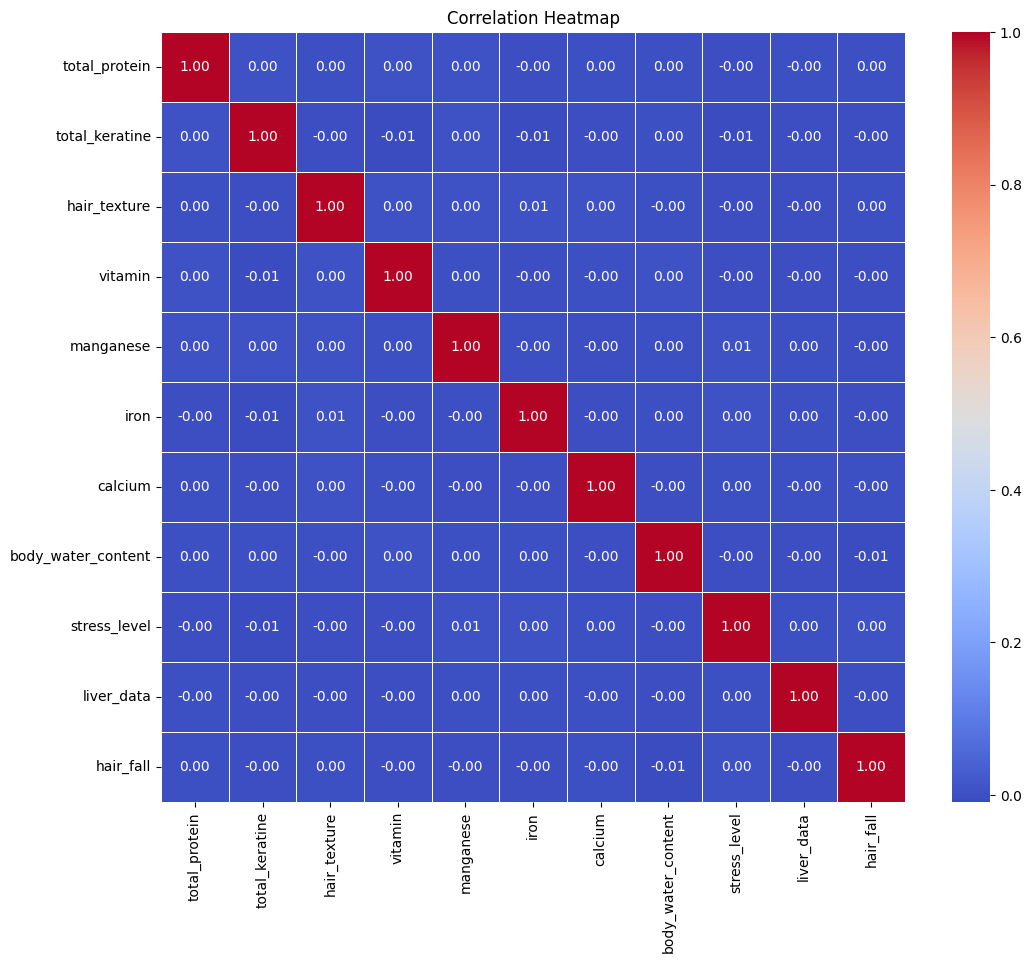

In [12]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Here we can see the features are not strongly correlated to each other

## Spliting Data into X(features) and Y(Label)

In [13]:
X = df.drop('hair_fall', axis=1)  # Features
y = df['hair_fall']  # Target variable

# Train Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape

(80000, 10)

In [16]:
X_test.shape

(20000, 10)

# Scaling Features

In [17]:
scaler = StandardScaler()

In [18]:
scaled_train_data=scaler.fit_transform(X_train)
scaled_test_data=scaler.fit_transform(X_test)

# Machine Learning algo

## Naive Bayes

In [19]:
naive_bayes = GaussianNB()

In [20]:
naive_bayes.fit(scaled_train_data, y_train)

GaussianNB()

In [21]:
y_pred = naive_bayes.predict(scaled_test_data)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)

Accuracy: 0.16255
Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.14      0.15      3348
           1       0.16      0.12      0.14      3317
           2       0.16      0.22      0.19      3296
           3       0.15      0.11      0.13      3328
           4       0.16      0.09      0.11      3345
           5       0.17      0.30      0.22      3366

    accuracy                           0.16     20000
   macro avg       0.16      0.16      0.15     20000
weighted avg       0.16      0.16      0.15     20000



## Random forest

In [23]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [24]:
random_forest.fit(scaled_train_data, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_pred = random_forest.predict(scaled_test_data)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)

Accuracy: 0.16955
Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.20      0.19      3348
           1       0.16      0.17      0.17      3317
           2       0.17      0.18      0.17      3296
           3       0.17      0.16      0.16      3328
           4       0.17      0.15      0.16      3345
           5       0.17      0.16      0.17      3366

    accuracy                           0.17     20000
   macro avg       0.17      0.17      0.17     20000
weighted avg       0.17      0.17      0.17     20000



## Decision Tree

In [26]:
decision_tree = DecisionTreeClassifier(random_state=42)

In [27]:
decision_tree.fit(scaled_train_data, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = decision_tree.predict(scaled_test_data)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)

Accuracy: 0.16955
Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.20      0.19      3348
           1       0.16      0.17      0.17      3317
           2       0.17      0.18      0.17      3296
           3       0.17      0.16      0.16      3328
           4       0.17      0.15      0.16      3345
           5       0.17      0.16      0.17      3366

    accuracy                           0.17     20000
   macro avg       0.17      0.17      0.17     20000
weighted avg       0.17      0.17      0.17     20000



In [33]:
df = pd.read_csv('../content/drive/MyDrive/hair fall detection/data2.csv')
df.head()

,date,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
0,1/01/2021,Few,2,Low,0,1,NaN,Low,Pantene,No,Y,3.0,NaN,1
1,2/01/2021,Few,0,Low,0,3,NaN,Low,Pantene,No,N,1.0,NaN,1
2,3/01/2021,Medium,3,Low,1,0,NaN,Low,Pantene,Yes,Y,2.0,NaN,2
3,4/01/2021,Few,2,Low,0,1,NaN,Low,Pantene,No,N,3.0,NaN,3
4,5/01/2021,Few,2,Low,0,1,NaN,Low,Pantene,No,Y,1.0,NaN,2


In [34]:
df['dandruff'].replace('None',0,inplace=True)
df['dandruff'].replace('Few',1,inplace=True)
df['dandruff'].replace('Many',2, inplace=True)

df['hair_loss'].replace("Few", 0, inplace=True)
df['hair_loss'].replace("Medium", 0, inplace=True)
df['hair_loss'].replace("Many", 1, inplace=True)
df['hair_loss'].replace("A lot", 1, inplace=True)

df['swimming'].replace('Yes', 1, inplace=True)
df['swimming'].replace('No', 0, inplace=True)

df.replace('Low', 0, inplace=True)
df.replace('Medium', 1, inplace=True)
df.replace('High', 2, inplace=True)
df.replace('Very High', 3, inplace=True)



df.head()

,date,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
0,1/01/2021,0,2,0,0,1,NaN,0,Pantene,0,Y,3.0,NaN,1
1,2/01/2021,0,0,0,0,3,NaN,0,Pantene,0,N,1.0,NaN,1
2,3/01/2021,0,3,0,1,0,NaN,0,Pantene,1,Y,2.0,NaN,2
3,4/01/2021,0,2,0,0,1,NaN,0,Pantene,0,N,3.0,NaN,3
4,5/01/2021,0,2,0,0,1,NaN,0,Pantene,0,Y,1.0,NaN,2


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    400 non-null    object 
 1   hair_loss               400 non-null    int64  
 2   stay_up_late            400 non-null    int64  
 3   pressure_level          400 non-null    int64  
 4   coffee_consumed         400 non-null    int64  
 5   brain_working_duration  400 non-null    int64  
 6   school_assesssment      95 non-null     object 
 7   stress_level            400 non-null    int64  
 8   shampoo_brand           400 non-null    object 
 9   swimming                400 non-null    int64  
 10  hair_washing            400 non-null    object 
 11  hair_grease             396 non-null    float64
 12  dandruff                111 non-null    float64
 13  libido                  400 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory 

In [38]:
X_df= df[['stress_level', 'pressure_level',"dandruff"]]

In [39]:
y_data = df['hair_loss'].to_numpy().astype(np.float16)
print(y_data.shape)

df.drop('hair_loss', axis=1, inplace=True)

X_data = X_df.to_numpy().astype(np.float16)

print(X_data.shape)

(400,)
(400, 3)


# **Train Test Split**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.05, random_state=42)
print(X_train.shape)
print(X_test.shape)

(380, 3)
(20, 3)


**Model Building**

In [41]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(3)))

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['acc'], optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model.fit(X_train, y_train,epochs=50,batch_size=64,validation_split=0.10, verbose=2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


6/6 - 4s - loss: nan - acc: 0.8596 - val_loss: nan - val_acc: 0.8158 - 4s/epoch - 695ms/step
Epoch 2/50
6/6 - 0s - loss: nan - acc: 0.8421 - val_loss: nan - val_acc: 0.8158 - 137ms/epoch - 23ms/step
Epoch 3/50
6/6 - 0s - loss: nan - acc: 0.8421 - val_loss: nan - val_acc: 0.8158 - 126ms/epoch - 21ms/step
Epoch 4/50
6/6 - 0s - loss: nan - acc: 0.8421 - val_loss: nan - val_acc: 0.8158 - 153ms/epoch - 26ms/step
Epoch 5/50
6/6 - 0s - loss: nan - acc: 0.8421 - val_loss: nan - val_acc: 0.8158 - 109ms/epoch - 18ms/step
Epoch 6/50
6/6 - 0s - loss: nan - acc: 0.8421 - val_loss: nan - val_acc: 0.8158 - 138ms/epoch - 23ms/step
Epoch 7/50
6/6 - 0s - loss: nan - acc: 0.8421 - val_loss: nan - val_acc: 0.8158 - 125ms/epoch - 21ms/step
Epoch 8/50
6/6 - 0s - loss: nan - acc: 0.8421 - val_loss: nan - val_acc: 0.8158 - 90ms/epoch - 15ms/step
Epoch 9/50
6/6 - 0s - loss: nan - acc: 0.8421 - val_loss: nan - val_acc: 0.8158 - 89ms/epoch - 15ms/step
Epoch 10/50
6/6 - 0s - loss: nan - acc: 0.8421 - val_loss: na

In [43]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 42ms/step - loss: nan - acc: 0.8500


[nan, 0.8500000238418579]

# **Result: He was hair loss**


In [44]:
model.predict(np.array([[2,2,2]]))

1/1 [==============================] - 0s 164ms/step


array([[nan]], dtype=float32)